In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
X,y=make_moons(n_samples=1000,random_state=42,noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Voting classifer

In [3]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf=LogisticRegression()
svc_clf=SVC(probability=True)
rnd_clf=RandomForestClassifier()
voting_clf=VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svc_clf)],
    voting="hard")
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [4]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,svc_clf,rnd_clf,voting_clf):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.8533333333333334
SVC 0.9166666666666666
RandomForestClassifier 0.92
VotingClassifier 0.9166666666666666


# Bagging and pasting 

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1
)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)

In [6]:
accuracy_score(y_test,y_pred)

0.9133333333333333

# Out of the bag Evaluation

In [7]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,oob_score=True
)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)

In [8]:
accuracy_score(y_test,y_pred)

0.91

# AdaBoost

In [9]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [10]:
y_pred=bag_clf.predict(X_test)

In [11]:
accuracy_score(y_test,y_pred)

0.91

# Gradienet Boosting 

## Gradient Booste Regression Trees

In [14]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1=DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
y2=y-tree_reg1.predict(X)
tree_reg2=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
y3=y2-tree_reg2.predict(X)
tree_reg3=DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

## Applying this with Sklearn

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Using staged_predict

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

In [21]:
gbrt = GradientBoostingRegressor()
gbrt.fit(X_train,y_train)
errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]

In [22]:
best_n=np.argmin(errors)
gbrt_best=GradientBoostingRegressor(max_depth=2,n_estimators=best_n)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=47,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Stopping without staged_predict




In [26]:
gbrt=GradientBoostingRegressor(max_depth=2,warm_start=True)
min_val_error=float("inf")
error_going_up=0
for n_estimators in range(1,300):
  gbrt.n_estimators=n_estimators
  gbrt.fit(X_train,y_train)
  y_pred=gbrt.predict(X_val)
  val_error=mean_squared_error(y_val,y_pred)
  if val_error<min_val_error:
    val_error=min_val_error
    error_going_up=0
  else:
    error_goiing_up+=1
    if error_going_up==5:
      break

In [27]:
n_estimators

299

In [28]:
import xgboost

In [29]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

[17:00:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
xgb_reg.fit(X_train, y_train,
eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)

[17:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.468394
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.441026
[2]	validation_0-rmse:0.417523
[3]	validation_0-rmse:0.396429
[4]	validation_0-rmse:0.379179
[5]	validation_0-rmse:0.361981
[6]	validation_0-rmse:0.347942
[7]	validation_0-rmse:0.33581
[8]	validation_0-rmse:0.324907
[9]	validation_0-rmse:0.315684
[10]	validation_0-rmse:0.307082
[11]	validation_0-rmse:0.300168
[12]	validation_0-rmse:0.293748
[13]	validation_0-rmse:0.287918
[14]	validation_0-rmse:0.282992
[15]	validation_0-rmse:0.278419
[16]	validation_0-rmse:0.274561
[17]	validation_0-rmse:0.27087
[18]	validation_0-rmse:0.267651
[19]	validation_0-rmse:0.265043
[20]	validation_0-rmse:0.26267
[21]	validation_0-rmse:0.260262
[22]	validation_0-rmse:0.258626
[23]	validation_0-rmse:0.256666
[24]	validation_0-rmse:0.254628
[25]	validation_0-rmse

#Stacking 

In [31]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
print(X.shape, y.shape)

(1000, 20) (1000,)


>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.825 (0.040)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.020)


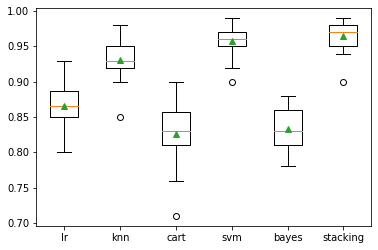

In [36]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()